# SymbolicBayesTree

A `SymbolicBayesTree` is a tree structure where each node (`SymbolicBayesTreeClique`) represents a clique of variables that were eliminated together during multifrontal elimination. Unlike a `SymbolicJunctionTree` which stores factors, a `SymbolicBayesTree` stores the resulting `SymbolicConditional` for each clique.

It represents the factored structure $P(X) = Π P(C_j | S_j)$, where $C_j$ are the frontal variables of clique $j$ and $S_j$ are its separator variables (parents in the Bayes Tree). This structure is computationally advantageous for inference, especially for calculating marginals or performing incremental updates (like in iSAM).

<a href="https://colab.research.google.com/github/borglab/gtsam/blob/develop/gtsam/symbolic/doc/SymbolicBayesTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install --quiet gtsam-develop

Note: you may need to restart the kernel to use updated packages.


In [1]:
from gtsam import SymbolicFactorGraph, Ordering
from gtsam.symbol_shorthand import X, L
import graphviz # For visualization

## Creating a SymbolicBayesTree

A Bayes tree is typically created by eliminating a `SymbolicFactorGraph` using the multifrontal method.

In [20]:
# Create a factor graph from a GTSFM problem
graph = SymbolicFactorGraph()

edges = [(2, 4), (2, 5), (2, 27), (4, 6), (5, 6), (5, 7), (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), 
         (7, 8), (7, 9), (8, 9), (9, 12), (9, 24), (9, 28), (10, 12), (10, 29), (20, 21), (20, 22), 
         (20, 23), (20, 24), (21, 22), (21, 23), (21, 24), (22, 23), (22, 24), (23, 24), (25, 26), 
         (25, 27), (25, 28), (25, 29), (26, 27), (26, 28), (26, 29), (27, 28), (27, 29), (28, 29)]

for i,j in edges:
    graph.push_factor(X(i), X(j))

# Define an elimination ordering
ordering = Ordering.MetisSymbolicFactorGraph(graph)  # Use METIS for this example

# Eliminate using Multifrontal method
bayes_tree = graph.eliminateMultifrontal(ordering)

## Visualization and Properties

The Bayes tree structure can be visualized, and we can query its properties.

In [21]:
print(f"\nBayes Tree size (number of cliques): {bayes_tree.size()}")
print(f"Is the Bayes Tree empty? {bayes_tree.empty()}")


Bayes Tree size (number of cliques): 8
Is the Bayes Tree empty? False


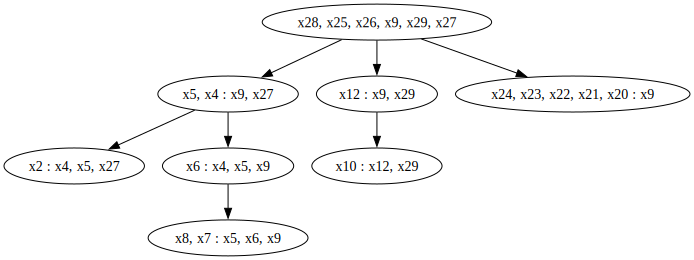

In [22]:
# Visualize the Bayes tree using graphviz
display(graphviz.Source(bayes_tree.dot()))

## Traversing a Bayes Tree

In [23]:
roots = bayes_tree.roots()
print(f"Number of roots: {len(roots)}")

def traverse_clique(clique):
    if clique:
        clique.print("\nClique:\n")
        for j in range(clique.nrChildren()):
            traverse_clique(clique[j])

for root in roots:
    traverse_clique(root)

Number of roots: 1

Clique:
 P( x28 x25 x26 x9 x29 x27)

Clique:
 P( x5 x4 | x9 x27)

Clique:
 P( x2 | x4 x5 x27)

Clique:
 P( x6 | x4 x5 x9)

Clique:
 P( x8 x7 | x5 x6 x9)

Clique:
 P( x12 | x9 x29)

Clique:
 P( x10 | x12 x29)

Clique:
 P( x24 x23 x22 x21 x20 | x9)
